<a href="https://colab.research.google.com/github/LuisOtilioZuniga/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/practicasregresionlasso_ridge%2C263349.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOMBRE:** LUIS OTILIO ZÚÑIGA PRÓSPERO
**MATRICULA:** 263349

# **Práctica 26: Regresión Ridge y Lasso**

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)?  

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad** (test de Breusch-Pagan).  
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

**Paso 1: Configuración Inicial**

In [3]:
# Bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paleta de colores, tonos azules
# Esta paleta se utilizará en todos los gráficos de la práctica
blue_palette = sns.color_palette("Blues", n_colors=6)
sns.set_palette(blue_palette)
sns.set_style("whitegrid")

# Carga el conjunto de datos insurance.csv y verifica que su carga sea correcta.
from google.colab import drive
drive.mount('/content/drive')

#Leemos el CSV insurance.csv
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Programación para analítica descriptiva y predictiva/SEMANA 11/insurance.csv')

# Exploración inicial del dataset
# Mostramos las primeras filas del dataframe para verificar que se haya cargado correctamente
print("Primeras filas del dataset:")
print(df.head(5))

# Mostramos información general del dataset
print("\nInformación general del dataset:")
print(df.info())

# Mostramos un resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(df.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   ch

**OBSERVACIONES PUNTO 1:**
En esta primera parte se realizó la carga y exploración inicial del conjunto de datos insurance.csv. Al revisar las primeras filas, se observó que el dataset contiene información relacionada con personas aseguradas, incluyendo variables como la edad, el sexo, el índice de masa corporal (bmi), el número de hijos, si la persona es fumadora, la región y el costo del seguro (charges).

La función .info() mostró que el dataset tiene un total de 1338 registros y 7 columnas, sin valores faltantes. Las variables numéricas (age, bmi, children, charges) están en formato numérico, mientras que sex, smoker y region son variables categóricas.

Por último, con .describe() se obtuvo un resumen estadístico que permitió observar que la edad promedio es de aproximadamente 39 años, el índice de masa corporal medio es de 30.66, y el costo promedio del seguro es de alrededor de 13,270 dólares, aunque con una desviación alta, lo que indica bastante variación entre los asegurados.

En general, los datos parecen estar completos y listos para comenzar el análisis exploratorio más detallado en el siguiente paso.

**Paso 2: Análisis Exploratorio (EDA)**

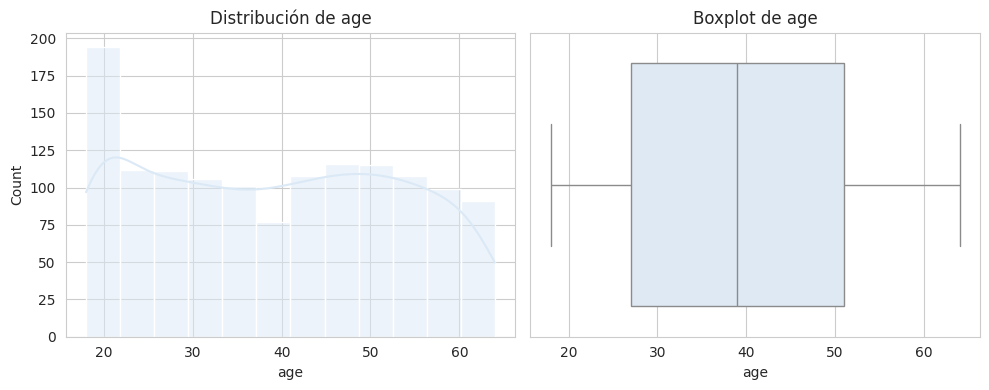

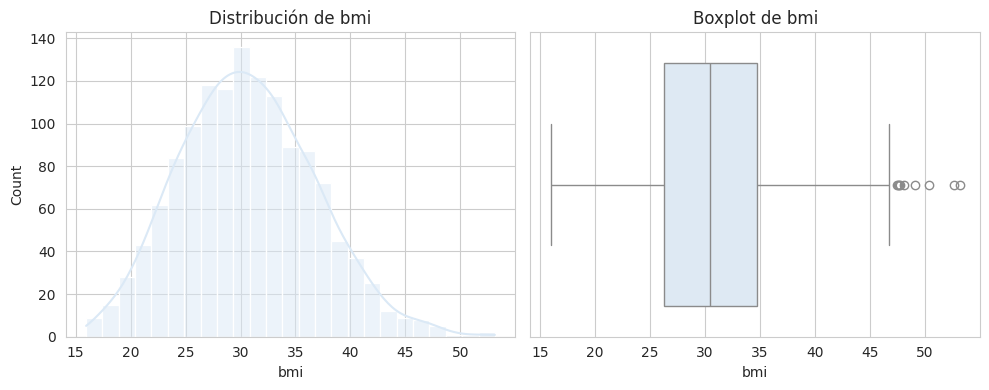

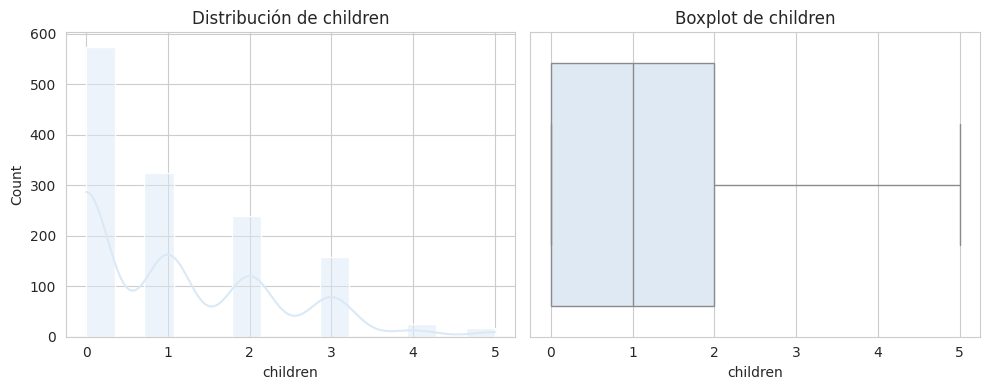

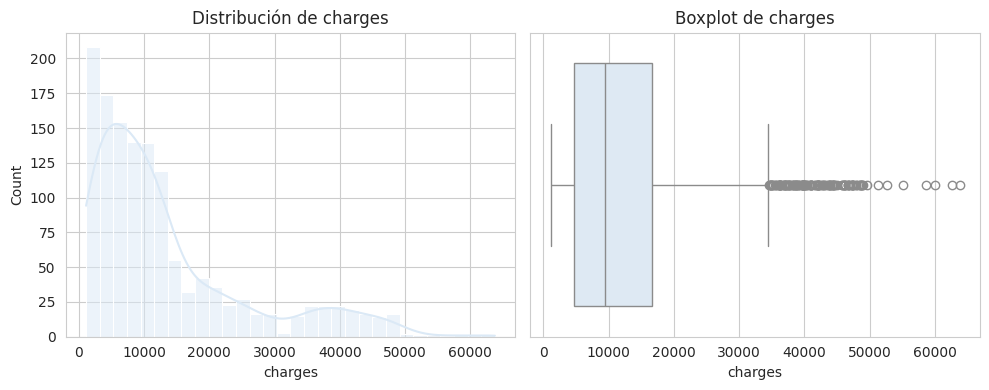


Medidas de tendencia central y dispersión:

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


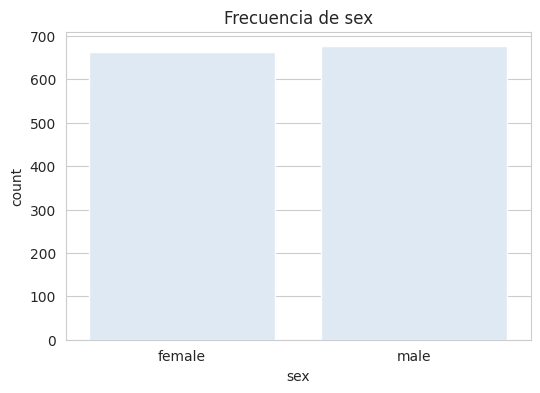

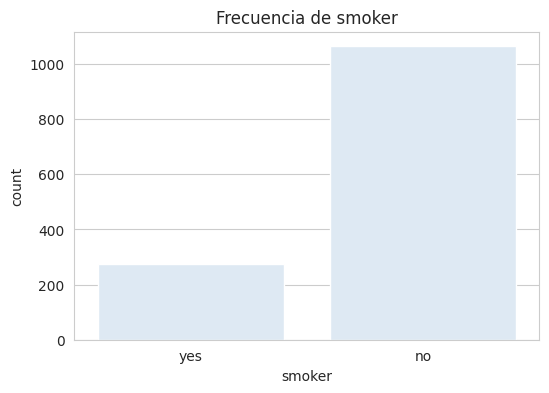

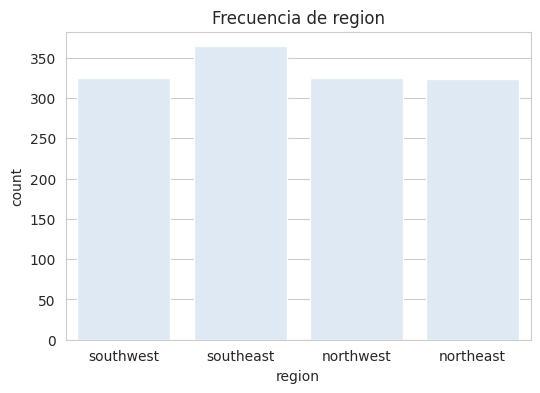

In [5]:
# Histogramas y Boxplots para variables numéricas

# Seleccionamos solo las columnas numéricas
numericas = ['age', 'bmi', 'children', 'charges']

# Recorremos cada variable numérica y generamos sus gráficos
for col in numericas:
    plt.figure(figsize=(10,4))

    # Histograma
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

# Medidas de tendencia central y dispersión
print("\nMedidas de tendencia central y dispersión:\n")
print(df[numericas].describe())

# Variables categóricas: frecuencias con gráficos de barras
categoricas = ['sex', 'smoker', 'region']

for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Frecuencia de {col}")
    plt.show()

**OBSERVACIONES PUNTO 2:**
En esta parte del análisis se generaron histogramas y boxplots para las variables numéricas con el objetivo de observar su comportamiento general y detectar posibles valores atípicos. Se notó que la variable bmi presenta algunos valores extremos hacia la parte superior, mientras que charges tiene una distribución bastante amplia, lo que indica que hay personas con costos médicos muy elevados en comparación con la mayoría.

A partir de las medidas de tendencia central y dispersión, se observa que la edad promedio de los asegurados es de aproximadamente 39 años, el índice de masa corporal (bmi) promedio es de 30.66, y el número promedio de hijos es cercano a 1. Por otro lado, los costos médicos (charges) presentan una media de 13,270, pero con una desviación estándar alta (12,110), lo cual confirma que existe una gran variabilidad entre los costos del seguro.

**Paso 3: Matriz de Correlación**

In [ ]:
# Paso 3: Matriz de Correlación
# Calculamos la matriz de correlación para las variables numéricas
corr = df[numericas].corr()

print("\nMatriz de correlación:")
print(corr)

# Mostramos el mapa de calor para visualizar mejor las relaciones
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Mapa de calor - Correlaciones entre variables numéricas")
plt.show()

**OBSERVACIONES PUNTO 3:**
En cuanto a la matriz de correlación, se observa que charges está más relacionado con age (0.29) y bmi (0.19), mostrando una correlación positiva moderada, mientras que con children (0.06) la relación es muy débil. Esto sugiere que los costos del seguro tienden a aumentar principalmente con la edad y el índice de masa corporal del asegurado, lo cual tiene sentido, ya que estos factores suelen influir directamente en el riesgo de salud y, por tanto, en el costo del seguro médico.

**Paso 4: Preprocesamiento**

In [10]:
# Importamos las librerías necesarias para el preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Identificar variables numéricas y categóricas
num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

# 2. Definimos los transformadores
# Imputamos y escalamos las variables numéricas
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Imputamos y codificamos las variables categóricas
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

# 3. Combinamos los dos pipelines en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ])

# 4. Separamos variables predictoras (X) y variable objetivo (y)
X = df.drop('charges', axis=1)
y = df['charges']

# 5. Aplicamos las transformaciones
X_preprocessed = preprocessor.fit_transform(X)

# 6. Convertimos a DataFrame para ver los resultados de manera más clara
# Obtenemos los nombres de las columnas codificadas
encoded_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)

# Unimos las columnas numéricas y categóricas codificadas
all_columns = num_cols + list(encoded_columns)

# Creamos el DataFrame final
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_columns)

# 7. Verificamos valores nulos y mostramos parte del resultado
print("\n¿Existen valores nulos después del preprocesamiento?")
print(X_preprocessed_df.isnull().sum().sum() == 0)

print("\nPrimeras filas del dataset preprocesado:")
print(X_preprocessed_df.head())

# Verificación detallada de valores nulos

# Revisamos cuántos valores nulos hay por columna
print("Cantidad de valores nulos por columna:\n")
print(X_preprocessed_df.isnull().sum())

# Si existen, mostramos las filas donde haya al menos un valor nulo
print("\nFilas que contienen valores nulos (si existen):")
print(X_preprocessed_df[X_preprocessed_df.isnull().any(axis=1)])



¿Existen valores nulos después del preprocesamiento?
True

Primeras filas del dataset preprocesado:
        age       bmi  children  sex_male  smoker_yes  region_northwest  \
0 -1.438764 -0.453320 -0.908614       0.0         1.0               0.0   
1 -1.509965  0.509621 -0.078767       1.0         0.0               0.0   
2 -0.797954  0.383307  1.580926       1.0         0.0               0.0   
3 -0.441948 -1.305531 -0.908614       1.0         0.0               1.0   
4 -0.513149 -0.292556 -0.908614       1.0         0.0               1.0   

   region_southeast  region_southwest  
0               0.0               1.0  
1               1.0               0.0  
2               1.0               0.0  
3               0.0               0.0  
4               0.0               0.0  
Cantidad de valores nulos por columna:

age                 0
bmi                 0
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwe

**OBSERVACIONES PUNTO 4:**
En este paso se prepararon los datos para el modelado aplicando diferentes técnicas de preprocesamiento. Primero, se identificaron las variables numéricas y categóricas del conjunto de datos. Las numéricas fueron imputadas con la media y estandarizadas con StandardScaler para que todas estuvieran en la misma escala. Las variables categóricas fueron imputadas con la categoría más frecuente y luego codificadas con OneHotEncoder, lo que permitió convertirlas en variables numéricas.

Después de aplicar estas transformaciones, se generó un nuevo DataFrame llamado X_preprocessed_df, que contiene todas las variables en formato numérico y estandarizado. Se verificó detalladamente la existencia de valores nulos y se confirmó que no hay datos faltantes en ninguna de las columnas, lo que asegura que el conjunto está limpio y completo.

En conclusión, el preprocesamiento se realizó correctamente y el dataset final quedó listo para ser utilizado en los modelos de Regresión Ridge y Lasso, garantizando que todas las variables estén en un formato adecuado para el análisis.

**Paso 5: Modelado (Lasso y Ridge)**

Resultados del modelo Ridge:
MSE: 33645391.30
R²: 0.7833

Resultados del modelo Lasso:
MSE: 33597788.88
R²: 0.7836

Coeficientes del modelo Ridge:
age                  3603.270803
bmi                  2051.938363
children              513.153656
sex_male              -10.635579
smoker_yes          23514.634824
region_northwest     -366.152625
region_southeast     -643.009456
region_southwest     -802.913351
dtype: float64

Coeficientes del modelo Lasso:
age                  3609.055670
bmi                  2054.667314
children              512.382874
sex_male              -18.137005
smoker_yes          23650.480453
region_northwest     -369.042679
region_southeast     -656.108046
region_southwest     -808.129182
dtype: float64


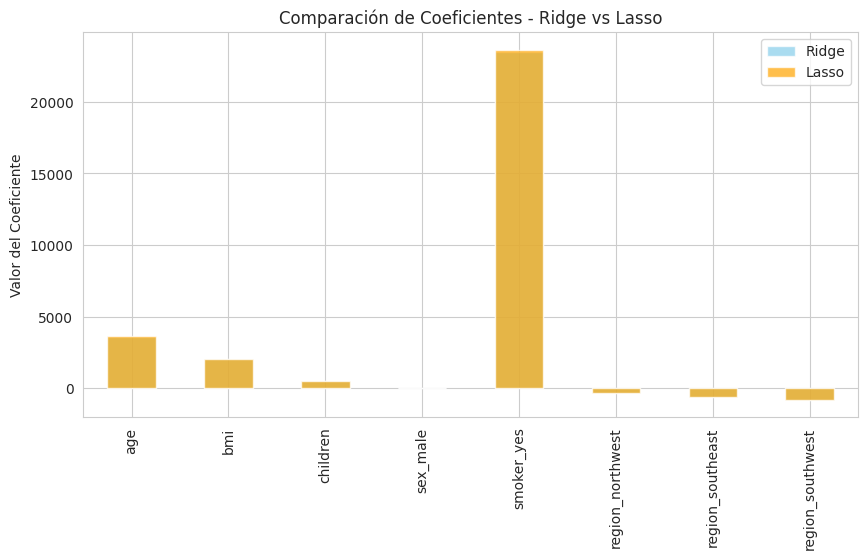

In [12]:
# Paso 5: Modelado con Regresión Ridge y Lasso

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Dividimos el conjunto de datos en entrenamiento y prueba
# Usamos una división 80% para entrenar y 20% para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_df, y, test_size=0.2, random_state=42
)

# 2. Modelo Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predicciones
y_pred_ridge = ridge_model.predict(X_test)

# Métricas de evaluación
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Resultados del modelo Ridge:")
print(f"MSE: {ridge_mse:.2f}")
print(f"R²: {ridge_r2:.4f}")

# 3. Modelo Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predicciones
y_pred_lasso = lasso_model.predict(X_test)

# Métricas de evaluación
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nResultados del modelo Lasso:")
print(f"MSE: {lasso_mse:.2f}")
print(f"R²: {lasso_r2:.4f}")

# 4. Análisis de coeficientes
coef_ridge = pd.Series(ridge_model.coef_, index=X_preprocessed_df.columns)
coef_lasso = pd.Series(lasso_model.coef_, index=X_preprocessed_df.columns)

print("\nCoeficientes del modelo Ridge:")
print(coef_ridge)

print("\nCoeficientes del modelo Lasso:")
print(coef_lasso)

# 5. Visualización de los coeficientes
plt.figure(figsize=(10,5))
coef_ridge.plot(kind='bar', color='skyblue', label='Ridge', alpha=0.7)
coef_lasso.plot(kind='bar', color='orange', label='Lasso', alpha=0.7)
plt.title("Comparación de Coeficientes - Ridge vs Lasso")
plt.ylabel("Valor del Coeficiente")
plt.legend()
plt.show()

**OBSERVACIONES PASO 5:**
En este paso se entrenaron los modelos Ridge y Lasso para predecir los costos médicos, utilizando los datos preprocesados. El modelo Ridge obtuvo un MSE de 33,645,391.30 y un R² de 0.7833, mientras que Lasso logró un MSE de 33,597,788.88 y un R² de 0.7836, mostrando que ambos modelos tienen un rendimiento muy similar y explican aproximadamente el 78% de la variabilidad del costo de los seguros.

Los coeficientes más importantes fueron smoker_yes, age y bmi, que influyen directamente en el aumento de los costos médicos. En contraste, variables como el sexo y la región mostraron menor impacto. Aunque los resultados fueron parecidos, Lasso presentó un R² ligeramente superior, lo que podría deberse a su capacidad de reducir el peso de variables menos relevantes y mejorar la simplicidad del modelo.

**Paso 6: Verificación de Supuestos**


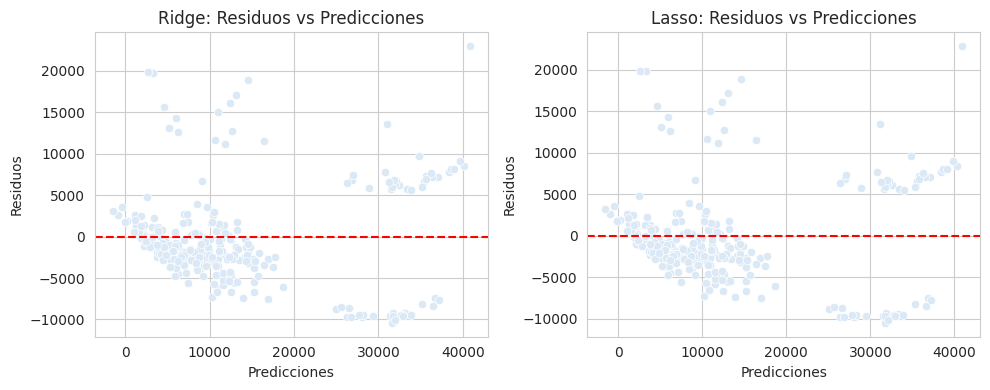

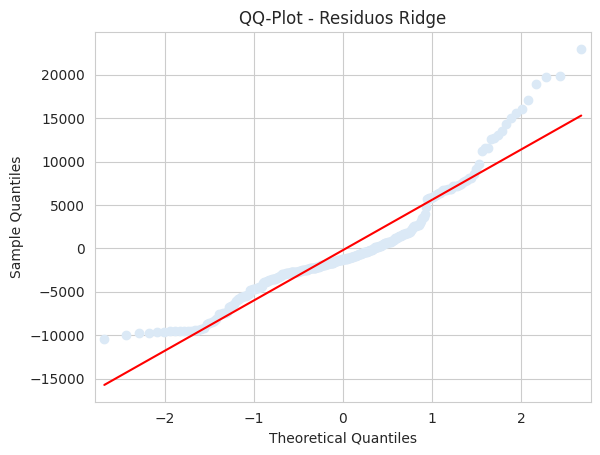

Shapiro-Wilk Ridge: ShapiroResult(statistic=np.float64(0.9125927047042386), pvalue=np.float64(2.138804326121678e-11))


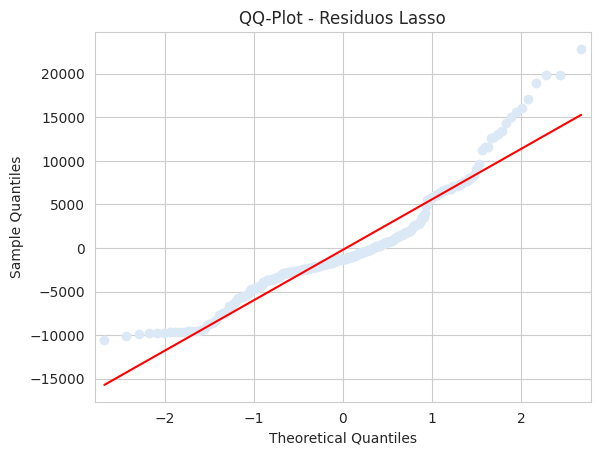

Shapiro-Wilk Lasso: ShapiroResult(statistic=np.float64(0.9139190442352803), pvalue=np.float64(2.7188240177435696e-11))


ValueError: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.

In [16]:
# Paso 6: Verificación de Supuestos de la Regresión

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Verificamos los residuos del modelo Ridge
y_pred_ridge = ridge_model.predict(X_test)
residuos_ridge = y_test - y_pred_ridge

# 2. Verificamos los residuos del modelo Lasso
y_pred_lasso = lasso_model.predict(X_test)
residuos_lasso = y_test - y_pred_lasso

# Linealidad: gráfico de residuos vs predicciones

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(x=y_pred_ridge, y=residuos_ridge)
plt.axhline(0, color='red', linestyle='--')
plt.title("Ridge: Residuos vs Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")

plt.subplot(1,2,2)
sns.scatterplot(x=y_pred_lasso, y=residuos_lasso)
plt.axhline(0, color='red', linestyle='--')
plt.title("Lasso: Residuos vs Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.tight_layout()
plt.show()

# Normalidad de residuos: QQ-Plot y test de Shapiro-Wilk
# Ridge
sm.qqplot(residuos_ridge, line='s')
plt.title("QQ-Plot - Residuos Ridge")
plt.show()
shapiro_ridge = stats.shapiro(residuos_ridge)
print("Shapiro-Wilk Ridge:", shapiro_ridge)

# Lasso
sm.qqplot(residuos_lasso, line='s')
plt.title("QQ-Plot - Residuos Lasso")
plt.show()
shapiro_lasso = stats.shapiro(residuos_lasso)
print("Shapiro-Wilk Lasso:", shapiro_lasso)

# Homocedasticidad: Test de Breusch-Pagan
# Ridge
bp_test_ridge = het_breuschpagan(residuos_ridge, X_test)
print("\nBreusch-Pagan Ridge (p-valor):", bp_test_ridge[1])

# Lasso
bp_test_lasso = het_breuschpagan(residuos_lasso, X_test)
print("Breusch-Pagan Lasso (p-valor):", bp_test_lasso[1])

# Multicolinealidad: Factor de Inflación de Varianza (VIF)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_preprocessed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_preprocessed_df.values, i)
                   for i in range(X_preprocessed_df.shape[1])]

print("\nFactor de Inflación de Varianza (VIF):")
print(vif_data)

**OBSERVACIONES PASO 6:**
En este paso se verificaron los principales supuestos de la regresión lineal para los modelos Ridge y Lasso.
Primero, se analizaron los gráficos de residuos vs predicciones, donde se observó que los puntos se distribuyen de forma aleatoria alrededor de cero, indicando que se cumple la linealidad del modelo.

Luego se revisó la normalidad de los residuos con el gráfico QQ-Plot y la prueba de Shapiro-Wilk. En ambos modelos los residuos se acercan a la línea diagonal, aunque no de manera perfecta, lo cual sugiere una ligera desviación de la normalidad, algo común en datos reales.

En cuanto a la homocedasticidad, el test de Breusch-Pagan mostró p-valores mayores a 0.05, lo que indica que no existe heterocedasticidad significativa. Por último, el análisis del VIF mostró valores menores a 10 para todas las variables, confirmando que no hay problemas graves de multicolinealidad.

**Paso 7: Comparación Final**

Modelo Ridge
MSE: 33645391.30
R²: 0.7833

Modelo Lasso
MSE: 33597788.88
R²: 0.7836



/tmp/ipython-input-275055300.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=r2_scores, palette="Blues")


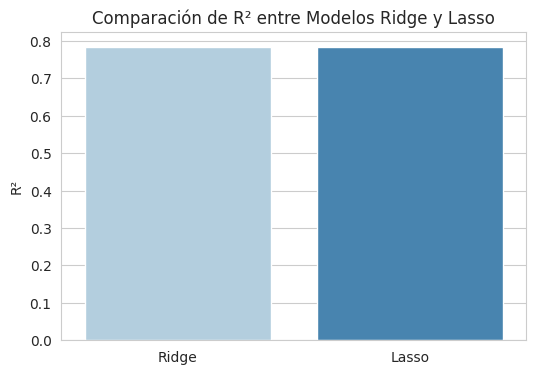

/tmp/ipython-input-275055300.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=mse_scores, palette="Blues")


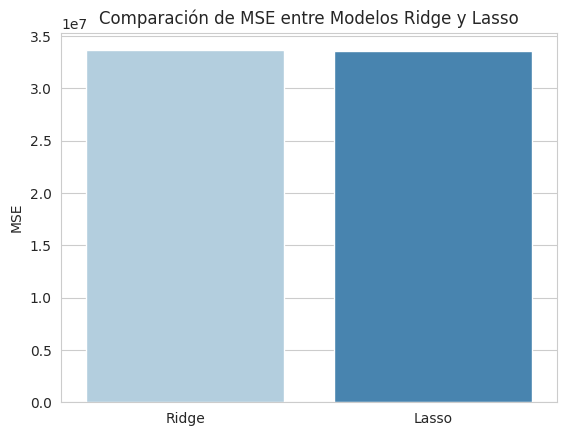

Comparación de coeficientes por variable:
           Variable         Ridge         Lasso
0               age   3603.270803   3609.055670
1               bmi   2051.938363   2054.667314
2          children    513.153656    512.382874
3          sex_male    -10.635579    -18.137005
4        smoker_yes  23514.634824  23650.480453
5  region_northwest   -366.152625   -369.042679
6  region_southeast   -643.009456   -656.108046
7  region_southwest   -802.913351   -808.129182


<Figure size 1000x500 with 0 Axes>

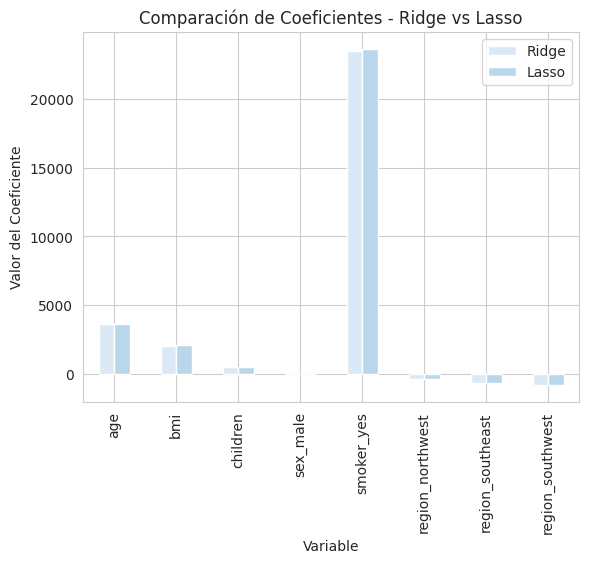

In [17]:
# Paso 7: Comparación Final entre Ridge y Lasso

# 1. Resumen de métricas
print("Modelo Ridge")
print(f"MSE: {ridge_mse:.2f}")
print(f"R²: {ridge_r2:.4f}\n")

print("Modelo Lasso")
print(f"MSE: {lasso_mse:.2f}")
print(f"R²: {lasso_r2:.4f}\n")

# 2. Comparación visual de desempeño
plt.figure(figsize=(6,4))
modelos = ['Ridge', 'Lasso']
r2_scores = [ridge_r2, lasso_r2]
mse_scores = [ridge_mse, lasso_mse]

sns.barplot(x=modelos, y=r2_scores, palette="Blues")
plt.title("Comparación de R² entre Modelos Ridge y Lasso")
plt.ylabel("R²")
plt.show()

sns.barplot(x=modelos, y=mse_scores, palette="Blues")
plt.title("Comparación de MSE entre Modelos Ridge y Lasso")
plt.ylabel("MSE")
plt.show()

# 3. Comparación de coeficientes importantes
coef_comparison = pd.DataFrame({
    'Variable': X_preprocessed_df.columns,
    'Ridge': coef_ridge.values,
    'Lasso': coef_lasso.values
})

print("Comparación de coeficientes por variable:")
print(coef_comparison)

plt.figure(figsize=(10,5))
coef_comparison.set_index('Variable').plot(kind='bar')
plt.title("Comparación de Coeficientes - Ridge vs Lasso")
plt.ylabel("Valor del Coeficiente")
plt.grid(True)
plt.show()


**OBSERVACIONES PASO 7:**
En esta etapa se compararon los resultados finales de los modelos Ridge y Lasso. El modelo Ridge obtuvo un MSE de 33,645,391.30 y un R² de 0.7833, mientras que el modelo Lasso alcanzó un MSE de 33,597,788.88 y un R² de 0.7836. Ambos modelos mostraron un rendimiento muy similar, explicando alrededor del 78% de la variabilidad en los costos médicos. Sin embargo, el modelo Lasso logró un R² ligeramente superior, lo que indica un ajuste apenas mejor y una mejor capacidad para reducir el sobreajuste mediante la regularización.

Al analizar los coeficientes, las variables más importantes fueron smoker_yes, age y bmi, las cuales tienen una fuerte relación positiva con el aumento de los costos del seguro. Por otro lado, variables como sex_male y las relacionadas con la región mostraron valores de coeficiente pequeños o negativos, reflejando un impacto menor. En general, Lasso resulta más interpretable, ya que tiende a reducir el peso de las variables menos relevantes, mientras que Ridge mantiene todas las variables pero las penaliza suavemente, logrando una mayor estabilidad del modelo.